In [36]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
%matplotlib inline

In [3]:
# Create Random Data and place into Df
# Create Random Data
col_1 = np.random.randint(0, 10001, (501,1), dtype='int64')
col_2 = np.random.rand(501,1)*1000
col_3= np.random.rand(501,1)
col_4= np.random.rand(501,1)*50000
col_5 = np.random.randint(0, 86, (501,1), dtype='int64')
col_6 = np.random.randint(0, 2, (501,1), dtype='int64')
data = [col_1, col_2, col_3, col_4, col_5, col_6]
columns = ['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6']
# Create Random Data df
mockdata_df=pd.DataFrame(index=list(range(0,501)))
for i in list(range(0,6)):
    mockdata_df[columns[i]]=data[i]
mockdata_df.head()


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,8071,151.711773,0.735773,20048.206783,44,0
1,8914,717.842753,0.764578,42410.844378,74,0
2,8095,449.993367,0.511476,45388.798648,13,1
3,884,87.461121,0.199440,40691.995210,62,1
4,3108,1.183245,0.179032,31155.647234,31,1


In [4]:
# define features and target
X=mockdata_df.copy()
X=X.drop('Column 6', axis=1,)
y=mockdata_df['Column 6']


In [5]:
# Create Training and Testing Data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [6]:
# Scale the Data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create Random Forest Instance
rf_model=RandomForestClassifier(n_estimators=500, random_state=5)

In [8]:
# Fit the Model with training sets
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=5)

In [9]:
# Make Predictions
predictions = rf_model.predict(X_test_scaled)

In [10]:
# Assess the model 
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
acc_score = accuracy_score(y_test, predictions)
# Display the Results
print('Confusion Matrix')
display(cm_df)
print(f'Accuracy Score: {acc_score}')
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15,42
Actual 1,30,39


Accuracy Score: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        57
           1       0.48      0.57      0.52        69

    accuracy                           0.43       126
   macro avg       0.41      0.41      0.41       126
weighted avg       0.41      0.43      0.42       126



In [11]:
# Determine Feature Importances and sort in descending order
sorted(zip(rf_model.feature_importances_,X.columns), reverse=True)

[(0.2150003784684509, 'Column 1'),
 (0.2082828218565108, 'Column 2'),
 (0.20651508840075658, 'Column 3'),
 (0.20020314898270675, 'Column 4'),
 (0.1699985622915749, 'Column 5')]

In [12]:
# Create new data for the model to make predictions with 
# Create Random Data and place into Df
# Create Random Data
col_1 = np.random.randint(0, 10001, (501,1), dtype='int64')
col_2 = np.random.rand(501,1)*1000
col_3= np.random.rand(501,1)
col_4= np.random.rand(501,1)*50000
col_5 = np.random.randint(0, 86, (501,1), dtype='int64')
data = [col_1, col_2, col_3, col_4, col_5]
columns = ['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5']
# Create Random Data df
newdata_df=pd.DataFrame(index=list(range(0,501)))
for i in list(range(0,5)):
    newdata_df[columns[i]]=data[i]
newdata_df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5
0,6217,127.530061,0.132878,5091.464611,32
1,6272,361.472135,0.565152,43520.107307,50
2,9182,460.228954,0.486632,34896.333593,60
3,4009,980.534250,0.358161,24560.692677,13
4,4628,698.368694,0.886554,25311.823958,42


In [13]:
# Use the model to make predictions about the new data
new_predictions = rf_model.predict(newdata_df)
# add the new predictions to the new dataframe
newdata_df['Predictions']=new_predictions
newdata_df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Predictions
0,6217,127.530061,0.132878,5091.464611,32,0
1,6272,361.472135,0.565152,43520.107307,50,0
2,9182,460.228954,0.486632,34896.333593,60,0
3,4009,980.534250,0.358161,24560.692677,13,0
4,4628,698.368694,0.886554,25311.823958,42,0


In [14]:
# Create a Function to change encoded labels to informative labels
def code_to_string(code):
    if code == 1:
        code = 'Treatment'
    else:
        code = 'No Treatment'
    return code

In [15]:
# apply function to predictions column
newdata_df['Predictions'] = newdata_df['Predictions'].apply(code_to_string)
newdata_df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Predictions
0,6217,127.530061,0.132878,5091.464611,32,No Treatment
1,6272,361.472135,0.565152,43520.107307,50,No Treatment
2,9182,460.228954,0.486632,34896.333593,60,No Treatment
3,4009,980.534250,0.358161,24560.692677,13,No Treatment
4,4628,698.368694,0.886554,25311.823958,42,No Treatment


In [16]:
# Count the Predictions
newdata_df['Predictions'].value_counts()


No Treatment    501
Name: Predictions, dtype: int64

# Multiple Linear Regression Mockup

In [17]:
# Create Random Data and place into Df
# Create Random Data
col_1 = np.random.randint(0, 10001, (501,1), dtype='int64')
col_2 = np.random.rand(501,1)*1000
col_3= np.random.rand(501,1)
col_4= np.random.rand(501,1)*50000
col_5 = np.random.randint(0, 86, (501,1), dtype='int64')
col_6 = np.random.randint(0, 10001, (501,1), dtype='int64')
col_7 = np.random.rand(501,1)*1000
col_8= np.random.rand(501,1)
col_9= np.random.rand(501,1)*50000
col_10 = np.random.randint(1, 100, (501,1), dtype='int64')
data = [col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10]
columns = ['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6', 'Column 7', 'Column 8', 'Column 9', 'Column 10']
# Create Random Data df
lm_df=pd.DataFrame(index=list(range(0,501)))
for i in list(range(0,10)):
    lm_df[columns[i]]=data[i]
lm_df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10
0,7851,483.185320,0.218207,39186.589570,24,2800,677.255651,0.311649,38800.081640,59
1,144,841.394293,0.034522,9736.459031,5,8635,913.157509,0.398817,36166.476137,15
2,1200,46.684858,0.173577,30410.280516,73,288,172.136873,0.507589,1110.011210,34
3,3223,234.441282,0.581806,47698.818659,82,4395,146.941333,0.416836,28312.236306,76
4,1102,506.412482,0.364739,33018.194940,32,8268,781.018183,0.054505,47098.246402,53


In [18]:
# check the data
print(lm_df.info())

print(lm_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Column 1   501 non-null    int64  
 1   Column 2   501 non-null    float64
 2   Column 3   501 non-null    float64
 3   Column 4   501 non-null    float64
 4   Column 5   501 non-null    int64  
 5   Column 6   501 non-null    int64  
 6   Column 7   501 non-null    float64
 7   Column 8   501 non-null    float64
 8   Column 9   501 non-null    float64
 9   Column 10  501 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 43.1 KB
None
          Column 1    Column 2    Column 3      Column 4    Column 5  \
count   501.000000  501.000000  501.000000    501.000000  501.000000   
mean   4877.305389  483.233514    0.511160  26166.011073   44.792415   
std    2947.854586  285.363486    0.297451  14619.856832   24.977126   
min      10.000000    1.184865    0.003490     94.682514    0.000000   

In [19]:
# split data into features and target df's
X = lm_df.drop('Column 10', axis=1).copy()
y=lm_df['Column 10']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [20]:
# Scale the Data with minmaxscaler
lm_scaler = MinMaxScaler()
lm_scaler.fit(X_train)
X_train_scaled = lm_scaler.transform(X_train)
X_test_scaled = lm_scaler.transform(X_test)

In [21]:
# build the model
X_train_lm = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Column 10   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.945
Date:                Sun, 15 May 2022   Prob (F-statistic):             0.0448
Time:                        14:35:05   Log-Likelihood:                -1781.0
No. Observations:                 375   AIC:                             3582.
Df Residuals:                     365   BIC:                             3621.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1186      7.697      6.771      0.000      36.983      67.255
Column 1   -3.589e-05      0.001     -0.071      0.943      -0.001       0.001
Column 2      -0.0095      0.005     -1.859      0.064      -0.020       0.001
Column 3       3.0637      5.003      0.612      0.541      -6.775      12.903
Column 4       0.0001      0.000      1.109      0.268   -8.72e-05       0.000
Column 5       0.0714      0.058      1.238      0.216      -0.042       0.185
Column 6      -0.0006      0.001     -1.230      0.219      -0.002       0.000
Column 7       0.0110      0.005      2.078      0.038       0.001       0.021
Column 8      -9.8318      5.297     -1.856      0.064     -20.248       0.584
Column 9   -8.326e-05   9.88e-05     -0.843      0.400      -0.000       0.000
==============================================================================
Omnibus:                       88.296   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.015
Skew:                           0.037   Prob(JB):                     0.000202
Kurtosis:                       1.959   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# checking variance inflaction factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
7,Column 8,3.81
6,Column 7,3.65
5,Column 6,3.61
3,Column 4,3.58
1,Column 2,3.57
8,Column 9,3.50
2,Column 3,3.49
4,Column 5,3.46
0,Column 1,3.42


C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

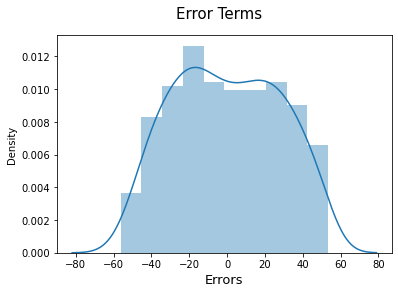

In [30]:
# Residual Analysis
predictions = lm_1.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - predictions), bins = 10)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize=13)

In [35]:
# determine if the final predicted model is the best fitted line
# make test predictions
X_test_lm = sm.add_constant(X_test)
test_predictions = lm_1.predict(X_test_lm)
r2_score(y_true=y_test, y_pred=test_predictions)

-0.04359136205926162

# Practice with Recursive Feature Elimination


In [40]:
# instantiate the linear model and fit with the data
lm_2 = LinearRegression()
lm_2.fit(X_train_scaled, y_train)
# instantiate the recursive feature elimination
rfe = RFE(lm_2, 5)
rfe=rfe.fit(X_train_scaled, y_train)

list(zip(X_train_scaled, rfe.support_, rfe.ranking_))

C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[(array([0.38973997, 0.32119995, 0.02029226, 0.97995608, 0.96470588,
         0.97638191, 0.48600966, 0.23431203, 0.9395235 ]),
  False,
  5),
 (array([0.03527515, 0.41830766, 0.57467588, 0.98286959, 0.68235294,
         0.90884422, 0.25274127, 0.64228625, 0.43141161]),
  True,
  1),
 (array([0.41705301, 0.11911147, 0.95723471, 0.09713009, 0.82352941,
         0.74      , 0.29921411, 0.5599045 , 1.        ]),
  False,
  4),
 (array([0.64654304, 0.06882545, 0.17825274, 0.39201752, 0.51764706,
         0.63728643, 0.22742519, 0.24250459, 0.36375393]),
  False,
  2),
 (array([0.63465027, 0.02832342, 0.25944335, 0.57578605, 0.90588235,
         0.07939698, 0.48689118, 0.88560448, 0.76276128]),
  True,
  1),
 (array([0.46845394, 0.41813186, 0.10213731, 0.35334814, 0.51764706,
         0.78271357, 0.1834438 , 0.19789023, 0.16190474]),
  True,
  1),
 (array([0.10965531, 0.48368587, 0.90882349, 0.71365889, 0.84705882,
         0.87939698, 0.60066489, 0.83127407, 0.71302264]),
  True,
  1),
 (a